In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Data Collection And Processing

In [2]:
# loading the csv data to pandas dataframe
gld_data=pd.read_csv('gld_price_data.csv')

In [3]:
# analysis of data 
gld_data.sample(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
1637,6/3/2015,2114.070068,113.639999,20.170000,15.830000,1.125784
1046,10/11/2012,1432.839966,171.320007,34.290001,32.900002,1.293326
167,10/31/2008,968.750000,71.339996,55.590000,9.580000,1.270196
975,6/6/2012,1315.130005,157.210007,32.150002,28.510000,1.257387
1084,12/13/2012,1419.449951,164.369995,31.580000,31.530001,1.306677


In [4]:
gld_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
# Statistical measures
gld_data.describe(include='all')

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
unique,2290,NaN,NaN,NaN,NaN,NaN
top,1/2/2008,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,1654.315776,122.732875,31.842221,20.084997,1.283653
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547
min,NaN,676.530029,70.000000,7.960000,8.850000,1.039047
25%,NaN,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,NaN,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,NaN,2073.010070,132.840004,37.827501,22.882500,1.369971


In [6]:
gld_data['EUR/USD'].max()

1.598798

In [7]:
gld_data.shape

(2290, 6)

In [8]:
# checking for missing values
gld_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
correlation=gld_data.corr()

<AxesSubplot:>

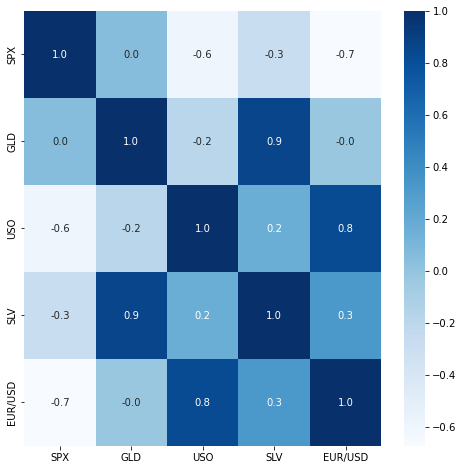

In [10]:
# Heat map to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,fmt='.1f',annot=True,cmap='Blues')

In [11]:
# correlation values of GLD
print (correlation['GLD'])


SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot:xlabel='GLD', ylabel='Density'>

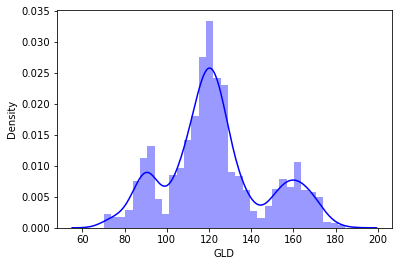

In [12]:
# check the distribution of gold price 
sns.distplot(gld_data['GLD'],color='blue')

splitting the features and target

In [13]:
X= gld_data.drop(['Date','GLD'],axis=1)
Y= gld_data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training and Test data

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=101)


In [17]:
regressor=RandomForestRegressor()

In [18]:
# train the model
regressor.fit(xtrain,ytrain)
print('RF Model:',round(100*regressor.score(xtest,ytest)),'%')

RF Model: 99 %


In [19]:
linear_model=LinearRegression().fit(xtrain,ytrain)
print('Linear Model:',round(100*linear_model.score(xtest,ytest)),'%')

Linear Model: 89 %


model evaluation

In [20]:
# prediction on test data
test_data_pred=regressor.predict(xtest)

In [21]:
print(test_data_pred)

[127.62759857 105.10319958 121.50790025 125.4485989  114.94329986
 118.98939983 154.96469962 122.31529927  99.19069937 125.53169984
 115.00000027 117.26740113 156.88759929 117.83359929 117.63109907
  92.16799929 167.05199739 125.08819904 115.04489961 172.04790143
 149.09530141 118.15780148 128.98839898 121.87069976 128.04150203
  89.85580035 119.20510113  90.63440132 120.41699891 125.55410193
  97.97739694 154.87060192 156.58499977 120.47940128 123.06559997
 148.06690176  96.73530015 114.57020015 161.43460246 116.53950056
 120.02740181 125.42480034 157.04110009 118.30950123 125.64399979
 114.8609005   86.62029931 107.33600012 116.64000081 125.07870204
 137.04500022  92.82279877 107.47260066 145.96290092 117.24560112
 154.95650264 120.43589904 165.32610183 161.90520213 131.61929827
 107.40109861 148.54250009 160.84589986  93.90559841 109.68400006
 116.1435009  121.08610105 110.14489903 119.93150203 127.42349798
  90.31330013 123.94870033 157.23160005 149.52690382  91.5492991
 123.855899

In [22]:
# R squared error 
error_score=metrics.r2_score(ytest,test_data_pred)
print('R squared error :',error_score)

R squared error : 0.9900136365778218


compare the actual and predicted values

In [23]:
ytest=list(ytest)

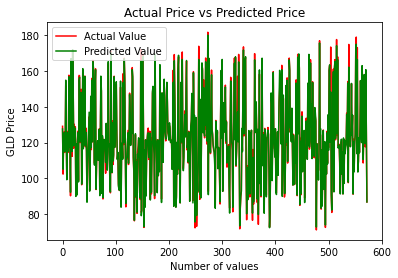

In [24]:
plt.plot(ytest,color='red',label='Actual Value')
plt.plot(test_data_pred,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [25]:
pd.to_pickle(regressor,'gld_price_prediction.pkl')

In [26]:
pd.to_pickle(linear_model,'gold_predictor.pkl')